<a href="https://colab.research.google.com/github/abdeslemblali/Bank-Market-Deposit-Prediction/blob/main/Mini-projet_datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
Quelles démarches la banque pourrait-elle entreprendre pour optimiser ses futures campagnes marketing et accroître leur efficacité ? Pour résoudre cette énigme, une exploration approfondie de la dernière campagne marketing s'impose, à la recherche de schémas récurrents et de tendances significatives. Comment tirer des leçons de cette expérience passée pour guider la conception de stratégies futurs, voilà la problématique à laquelle nous nous attaquerons.

## **Collecte des données**



Lien de la dataset : https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

**Description de la base de données**

1- age : Représente l'âge de l'individu.

2- job : Décrit la profession ou l'emploi de la personne.

3- marital : Indique le statut matrimonial de la personne (par exemple, marié, célibataire, divorcé).

4- education : Représente le niveau d'éducation de la personne (par exemple, primaire, secondaire, tertiaire).

5- default : Indique si la personne a des crédits en défaut ('oui', 'non' ou 'inconnu').

6- balance: indique le solde du compte

7- housing : Indique si la personne a un prêt immobilier ('oui', 'non' ou 'inconnu').

8- loan : Indique si la personne a un prêt personnel ('oui', 'non' ou 'inconnu').

9- contact : Décrit la méthode de communication utilisée pour contacter la personne (par exemple, 'cellulaire', 'téléphone').

10- day : Indique le jour de la semaine du dernier contact.

11- month : Représente le mois du dernier contact.

12- duration : Représente la durée du dernier contact en secondes.

13- campaign : Indique le nombre de contacts effectués au cours de cette campagne.

14- pdays : Décrit le nombre de jours depuis le dernier contact de la personne ou -1 si elle n'avait pas été contactée précédemment.

15- previous : Représente le nombre de contacts effectués avant cette campagne.

16- Poutcome : Indique le résultat de la précédente campagne marketing.

17- deposit : La variable cible, indiquant si la personne a souscrit à un dépôt à terme ('oui' ou 'non').






## **Chargement des bibliothèques nécessaires**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from plotly.offline import iplot

## **Lectureet et nettoyage des données**

In [ ]:
df=pd.read_csv('bank.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# **Vérification des valeurs nulles et en double**

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
fig = px.histogram(df["age"],
                   nbins=20,
                   color_discrete_sequence=["#FFA07A"],
                   labels = {"value" :"Ages", "count" : "Frequency"},
                   title="The Distribution of Ages",text_auto=True)

fig.update_layout(showlegend = False,title = {"font": {"size": 26,"family": "tahoma",}})
fig.update_traces(textfont= {"family": "consolas","size": 14}, hovertemplate = "Age Range: %{x}<br>Frequency: %{y}",marker = {"line": {"color": "#333", "width":1}} )

iplot(fig)

In [ ]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
df=df[df['job']!='unknown']

In [ ]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [ ]:
df.job = df.job.str.replace(".", "")

<ipython-input-20-513dbe17456b>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-20-513dbe17456b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin            1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [ ]:
age_job=pd.pivot_table(df, values='age', index='job', aggfunc='mean')
print(age_job)

                     age
job                     
admin          39.374063
blue-collar    39.505144
entrepreneur   42.887195
housemaid      47.445255
management     40.218239
retired        65.424165
self-employed  39.809877
services       38.141928
student        26.102778
technician     39.001646
unemployed     40.997199


<Figure size 1200x800 with 0 Axes>

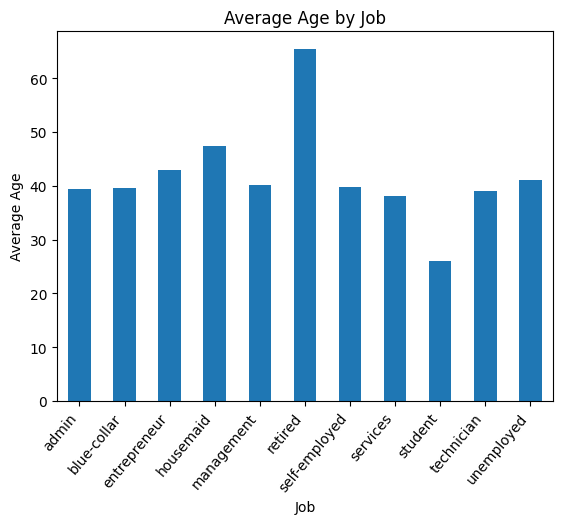

In [ ]:
plt.figure(figsize=(12,8))
age_job.plot(kind='bar', legend=False)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=50, ha='right')
plt.show()

In [ ]:
pd.crosstab(df.job,columns=df.education,values=df.age,aggfunc='mean').round(0)

education,primary,secondary,tertiary,unknown
job,,,,
admin,48.0,40.0,35.0,46.0
blue-collar,42.0,38.0,36.0,43.0
entrepreneur,46.0,43.0,42.0,46.0
housemaid,50.0,45.0,42.0,54.0
management,48.0,42.0,39.0,48.0
retired,67.0,64.0,64.0,70.0
self-employed,45.0,40.0,38.0,51.0
services,44.0,37.0,37.0,43.0
student,23.0,25.0,28.0,27.0


In [ ]:
df.education.value_counts()

secondary    5461
tertiary     3680
primary      1493
unknown       458
Name: education, dtype: int64

In [ ]:
df=df[df['education']!='unknown']

In [ ]:
df.education.value_counts()

secondary    5461
tertiary     3680
primary      1493
Name: education, dtype: int64

In [ ]:
def PiePlot(column,shadow=None):
    plt.figure(figsize=(12,6))
    plt.pie(df[column].value_counts(), labels = df[column].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.title(f'Pie Chart of {column}')
    plt.show()


In [ ]:
def countplot(data, hue=None, column=None, order=None, order_hue=None, saturation=1.0, label_dict=None):

    plt.figure(figsize=(10, 6))

    if column:
        plt.title(f'Countplot graph for {column} ')
        ax = sns.countplot(x=column, hue=hue, data=data, order=order, hue_order=order_hue, saturation=saturation)

        if order is not None and label_dict is not None:
            plt.xticks(ticks=range(len(order)), labels=[f' {i}: {label_dict[val]}' for i, val in enumerate(order)])

        # Annotate each bar with its count
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

    else:
        raise ValueError("Specify either column_x or column_y")

    plt.show()

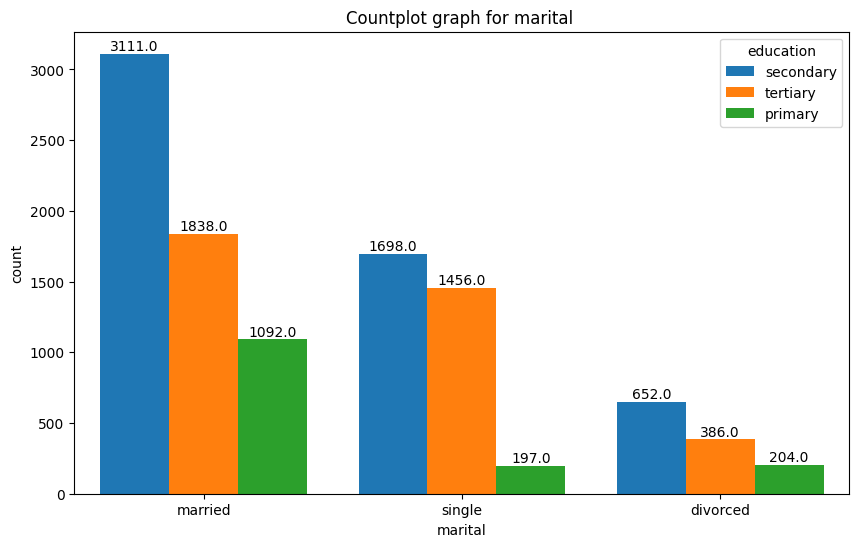

In [ ]:
countplot(df, hue='education', column='marital')

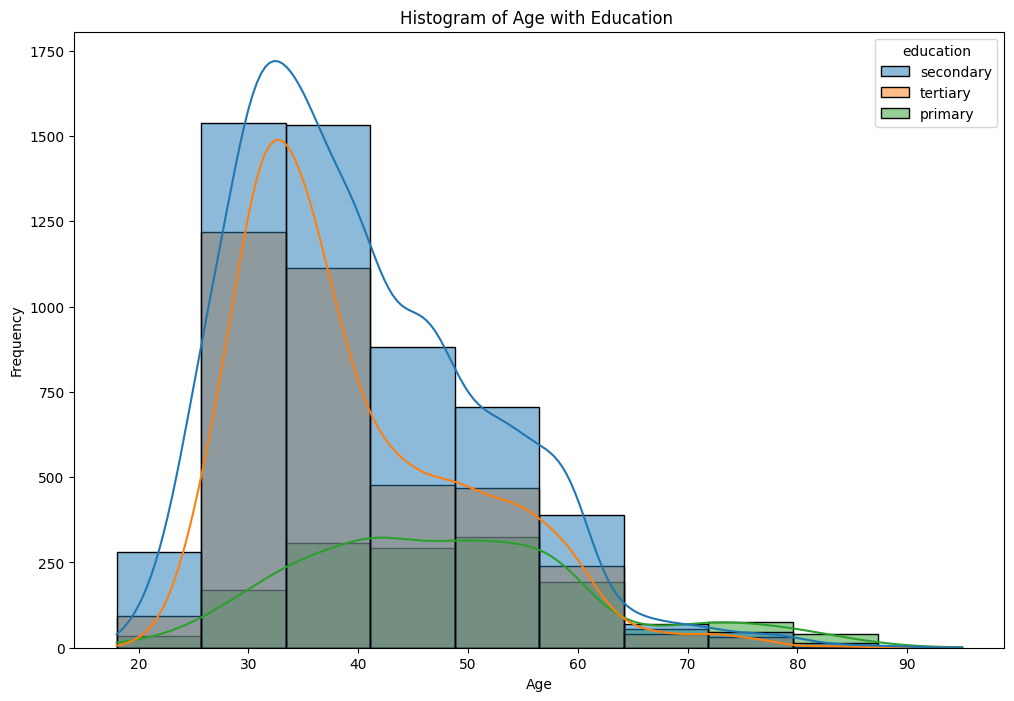

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x=df.age, hue=df.education, bins=10,kde=True)

plt.title('Histogram of Age with Education ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
print(df.default.unique())
df.default.value_counts()

['no' 'yes']


no     10475
yes      159
Name: default, dtype: int64

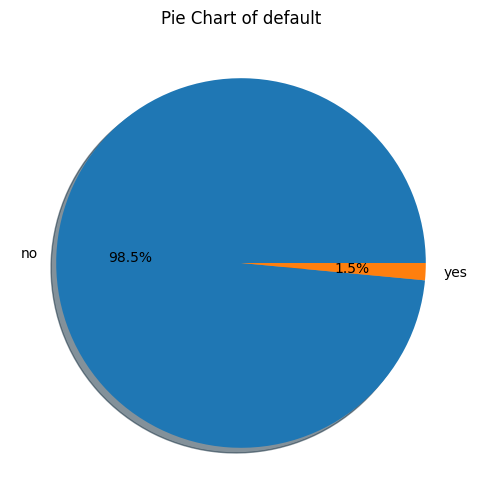

In [ ]:
PiePlot('default',shadow=True)

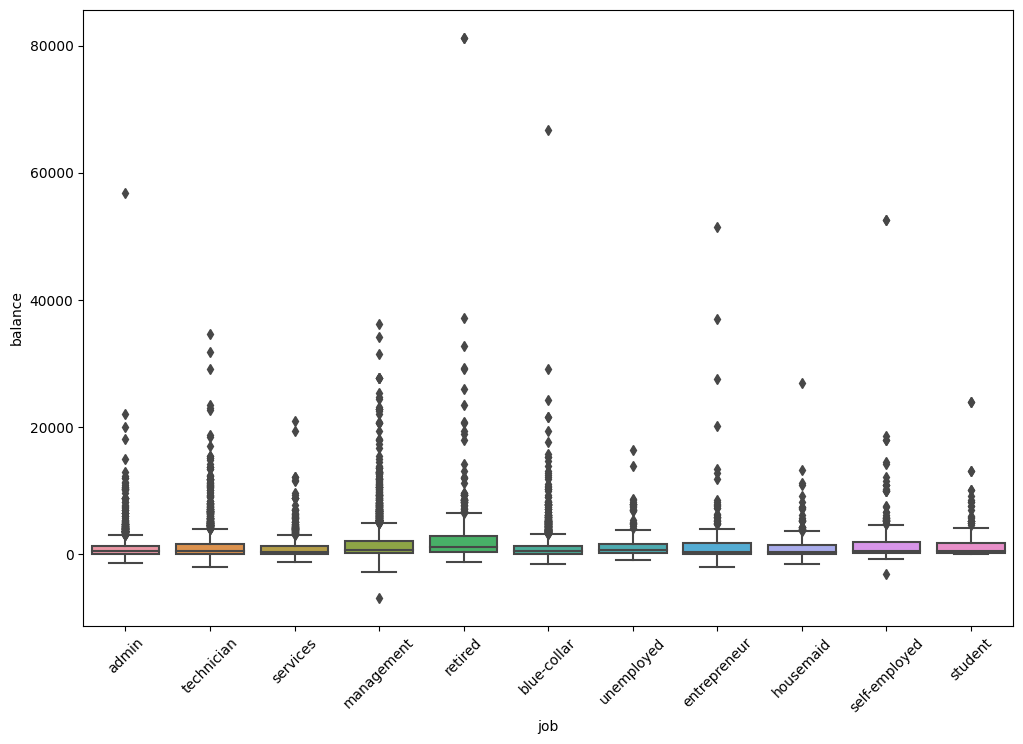

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x=df.job,y=df.balance)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[df['balance']==df.balance.max()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes


In [ ]:
df[df['balance']==df.balance.min()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6797,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


In [ ]:
df=df[df.balance>0]

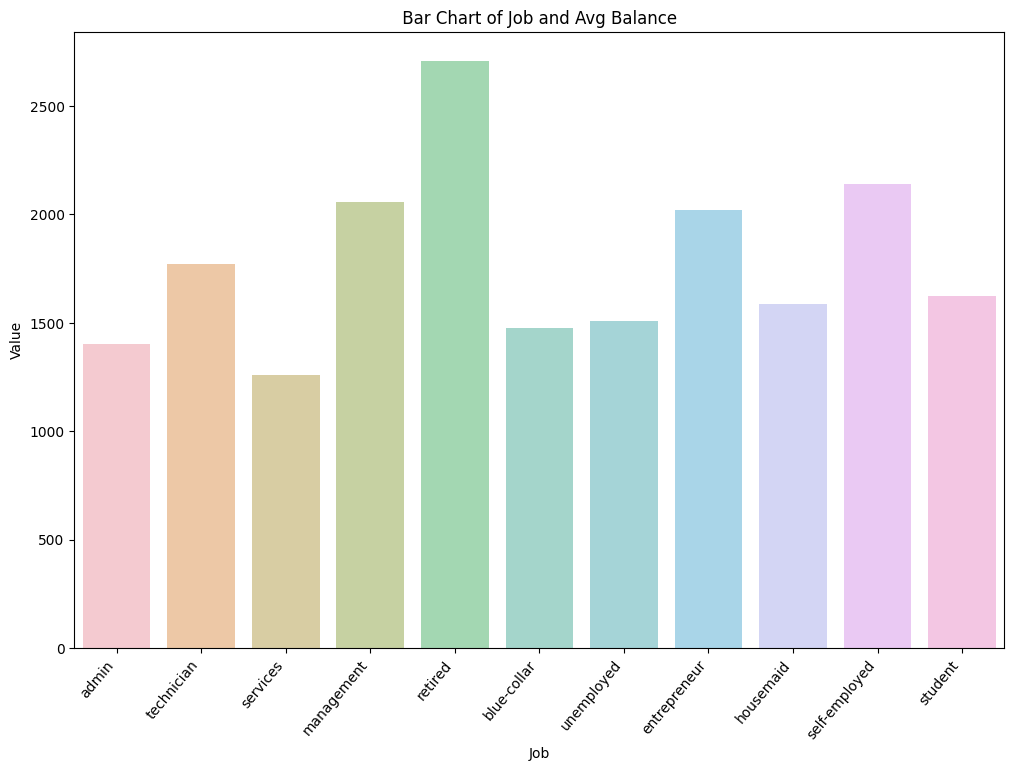

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='job', y='balance', data=df, alpha=0.5, errorbar=None)

# Set plot labels and title
plt.title(' Bar Chart of Job and Avg Balance ')
plt.xlabel('Job')
plt.ylabel('Value')

plt.xticks(rotation=50, ha='right')

# Show the plot
plt.show()

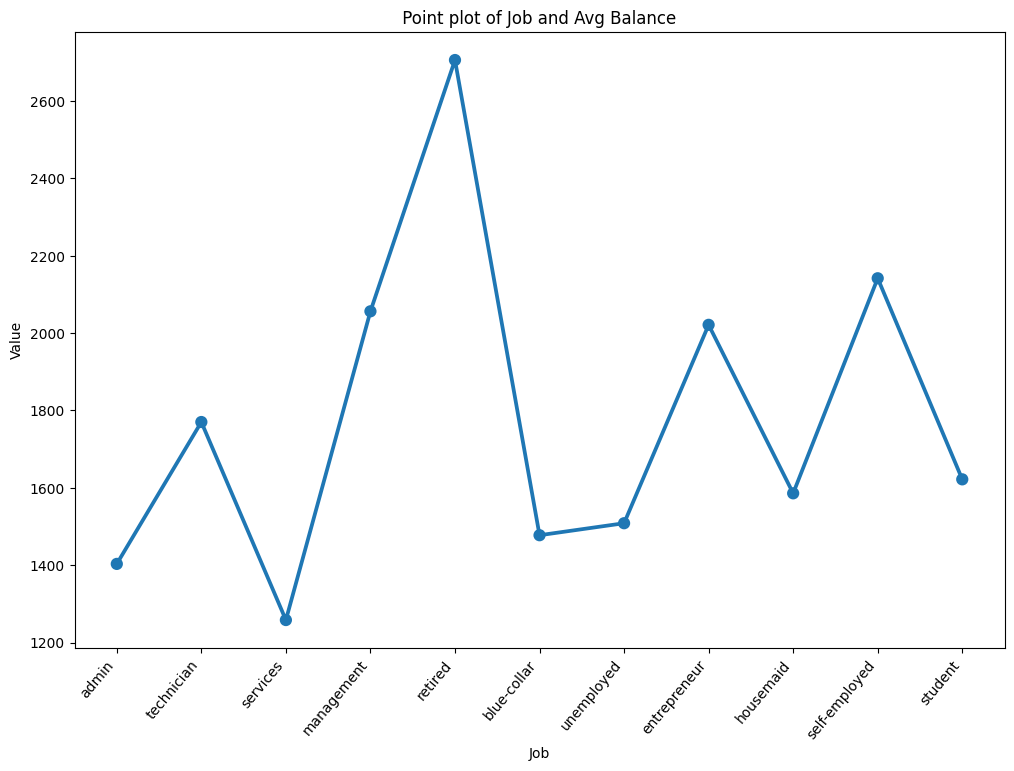

In [ ]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='job', y='balance', data=df, errorbar=None)

# Set plot labels and title
plt.title(' Point plot of Job and Avg Balance ')
plt.xlabel('Job')
plt.ylabel('Value')

plt.xticks(rotation=50, ha='right')

# Show the plot
plt.show()

In [ ]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.housing.value_counts()

no     4945
yes    4275
Name: housing, dtype: int64

In [ ]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.loan.value_counts()

no     8112
yes    1108
Name: loan, dtype: int64

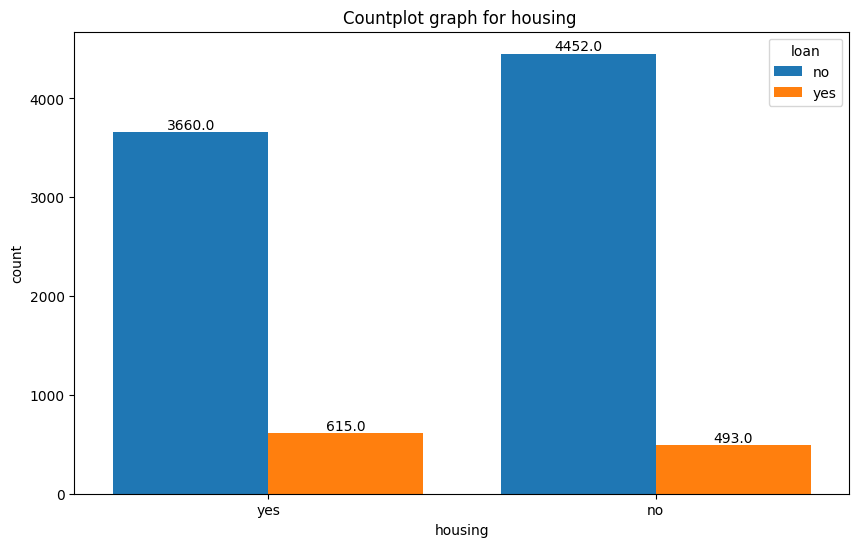

In [ ]:
countplot(data=df,column='housing',hue='loan')

In [ ]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df.contact.value_counts()

cellular     6718
unknown      1867
telephone     635
Name: contact, dtype: int64

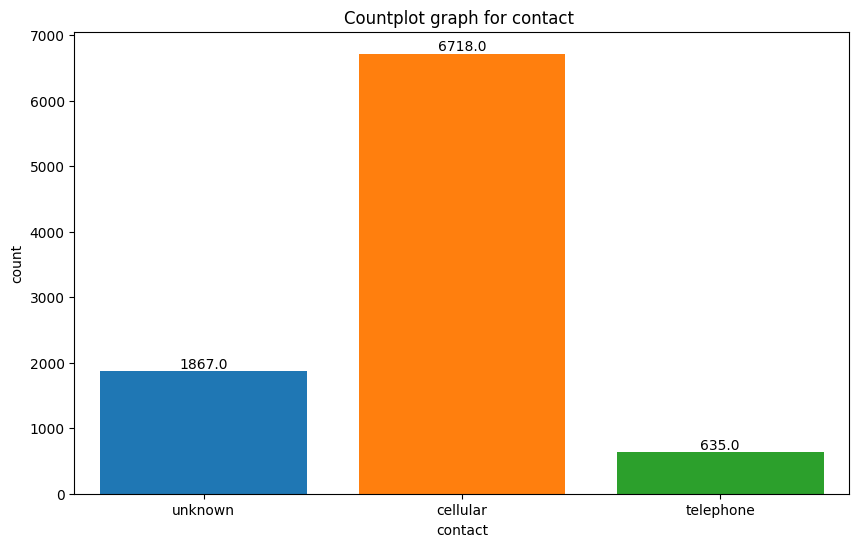

In [ ]:
countplot(data=df,column='contact')

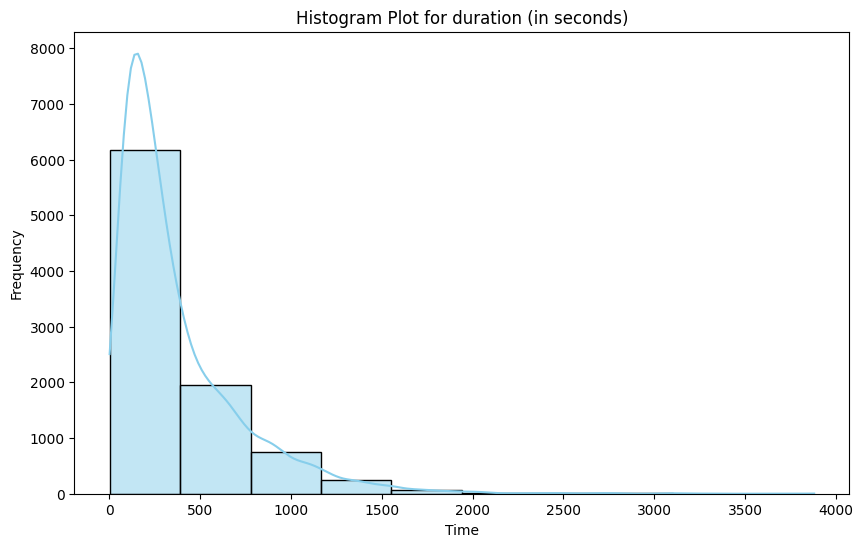

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=10, kde=True, color='skyblue')

# Set plot labels and title
plt.title('Histogram Plot for duration (in seconds)')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
result=pd.crosstab(index=df.marital,columns=df.job,values=df.duration,aggfunc='mean').round(2)
print(result)

job        admin  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                       
divorced  384.72       471.83        366.50     340.68      408.47   373.21   
married   338.58       383.50        332.57     350.82      353.58   393.67   
single    342.50       422.10        436.29     399.82      385.25   414.68   

job       self-employed  services  student  technician  unemployed  
marital                                                             
divorced         471.82    429.66   605.00      330.71      370.57  
married          346.71    371.06   408.92      352.83      427.48  
single           409.79    365.28   345.73      390.30      434.32  


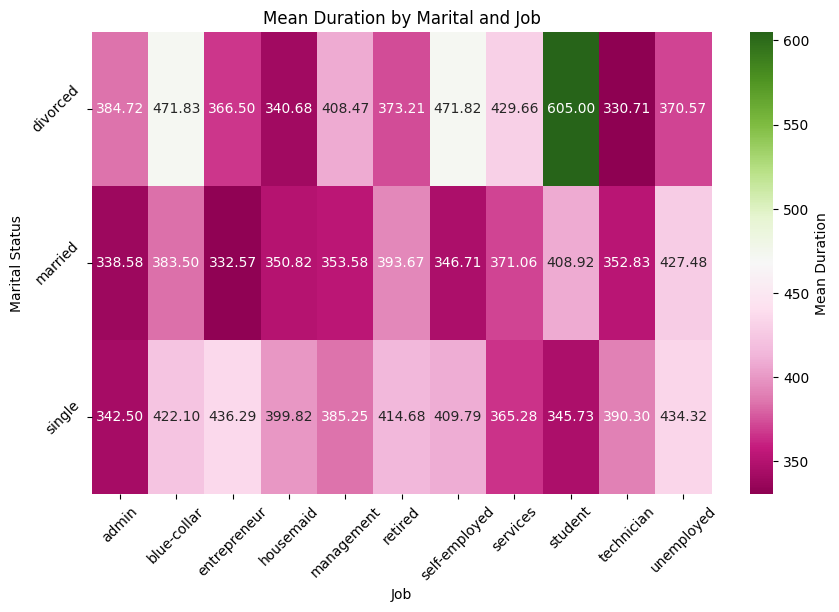

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, annot=True, cmap='PiYG', fmt='.2f', cbar_kws={'label': 'Mean Duration'})

# Set plot labels and title
plt.title('Mean Duration by Marital and Job')
plt.xlabel('Job')
plt.ylabel('Marital Status')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Show the plot
plt.show()

In [ ]:
df.campaign.value_counts()

1     4011
2     2479
3     1104
4      638
5      317
6      212
7      107
8       98
9       59
10      43
11      30
13      21
12      19
17      13
14      12
15      10
18       7
21       6
16       6
30       4
24       4
22       3
19       3
23       2
20       2
29       2
32       2
27       1
41       1
25       1
28       1
26       1
33       1
Name: campaign, dtype: int64

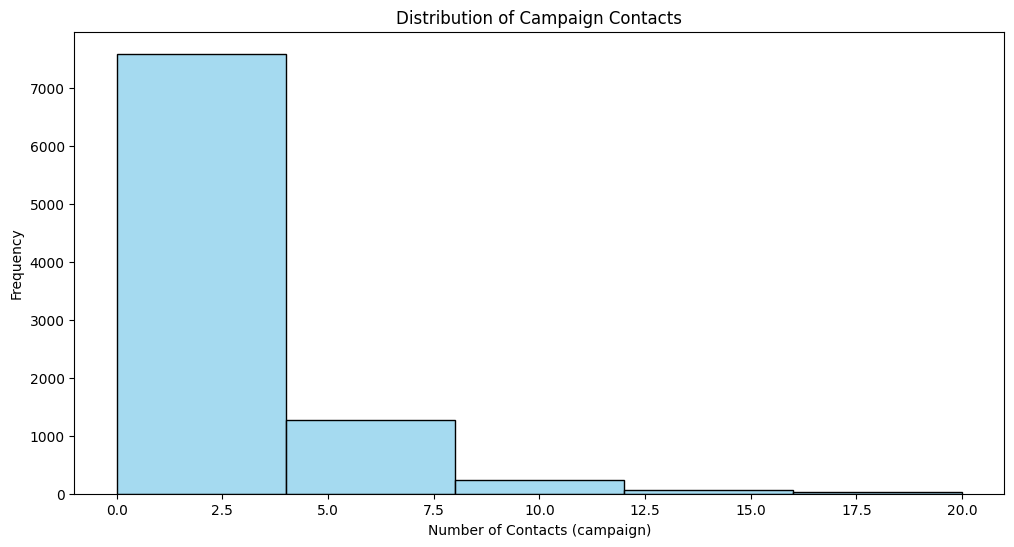

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df,x=df.campaign,bins=5,binrange=(0,20),color='skyblue')
plt.title('Distribution of Campaign Contacts')
plt.xlabel('Number of Contacts (campaign)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.poutcome.value_counts()

unknown    6757
failure    1050
success     955
other       458
Name: poutcome, dtype: int64

<Figure size 1000x600 with 0 Axes>

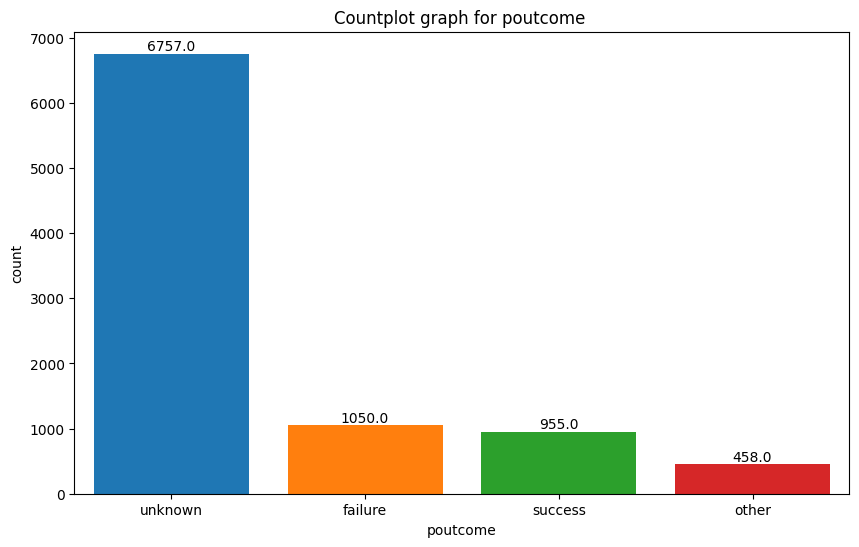

In [ ]:
plt.figure(figsize=(10, 6))
countplot(data=df,column='poutcome')

plt.show()

In [ ]:
df.pdays.unique()

array([ -1,  91, 147, 170, 150, 171, 126, 182, 198, 174, 175,  27, 128,
       100, 177, 122, 183, 195, 133, 178,  34, 163, 184, 154,  99,   2,
       242, 160,  90, 246, 238, 167, 268, 189,  92,  88,  93, 210,  85,
       257, 270, 196, 106, 199, 112,  41, 294, 231, 302, 135, 222, 138,
       323, 141, 267, 320, 264, 316, 315, 256, 146,  74, 327, 341, 145,
       234, 328, 318, 345, 325, 274, 343, 260, 305, 344, 254, 180,  82,
       181, 278,   4, 261, 349, 334, 176,  87, 269,  86, 169,  79,   6,
         9,  13, 350,  84,  80, 164, 296,  83,  76,  66, 263, 333,  17,
        89,  78, 337, 364, 188, 166, 342, 363, 352, 353, 356, 295, 367,
       366, 359, 284, 300, 306, 370, 286, 361, 287, 301, 355, 371, 360,
       358, 346, 357, 340, 312, 179, 329, 298, 372, 347, 374, 375, 266,
       291, 368,  95, 109,  10,  94,  98, 186, 101, 187, 321,  96,  21,
        35,  97, 285, 103, 212, 293,  38,  28,  67,  60, 120,  55, 113,
        71, 119,  72,  20, 391,  50, 207, 105, 314, 211, 140, 10

In [ ]:
df['pdays'] = df['pdays'].replace(-1, 0)
print(df.pdays.min())
print(df.pdays.max())

0
854


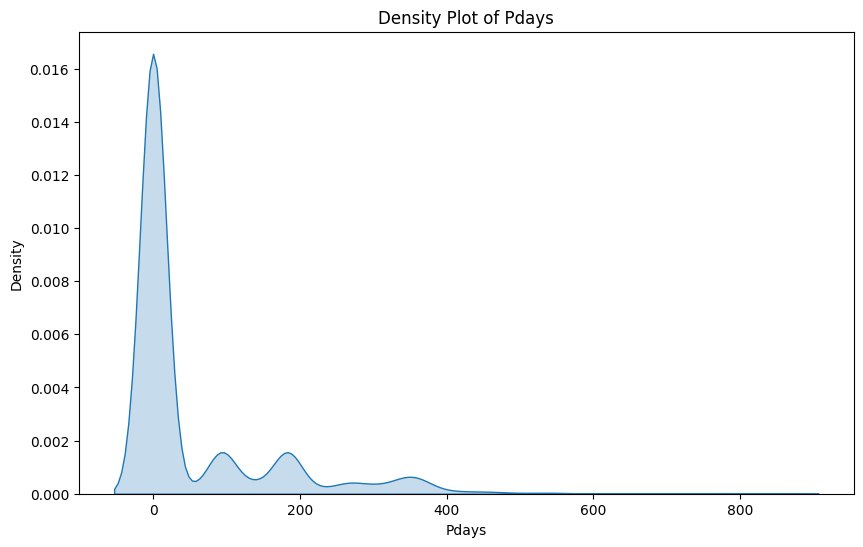

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=df.pdays, fill=True)
plt.title(f'Density Plot of Pdays')
plt.xlabel("Pdays")
plt.ylabel('Density')
plt.show()

In [ ]:
df.previous.unique()

array([ 0,  4,  2,  3,  1, 10,  7,  9,  5, 29,  6, 17,  8, 11, 30, 22, 13,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37])

In [ ]:
df.previous.value_counts()

0     6755
1      758
2      610
3      386
4      216
5      139
6      103
7       67
8       50
9       28
10      27
11      17
12      13
17      10
13       9
14       4
19       4
15       4
20       2
16       2
27       2
23       2
28       1
40       1
18       1
41       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

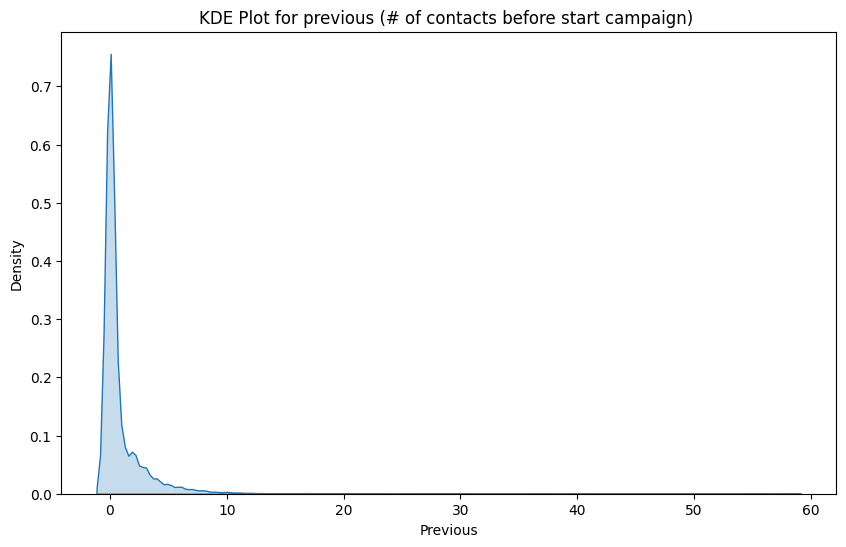

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=df.previous,fill=True)
plt.title(f'KDE Plot for previous (# of contacts before start campaign) ')
plt.xlabel("Previous")
plt.ylabel('Density')
plt.show()

## **Application de XGBoost pour la prédiction des dépôts**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
le=LabelEncoder()

In [ ]:
non_numeric_cols=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        pass
    else:
        non_numeric_cols.append(col)

In [ ]:
for col in non_numeric_cols:
    df[col]=le.fit_transform(df[col])
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,0,3,1
6,56,4,1,2,0,830,1,1,2,6,8,1201,1,0,0,3,1
7,60,5,0,1,0,545,1,0,2,6,8,1030,1,0,0,3,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,0,0,3,1
9,28,7,2,1,0,5090,1,0,2,6,8,1297,3,0,0,3,1
10,38,0,2,1,0,100,1,0,2,7,8,786,1,0,0,3,1


In [ ]:
x=df.iloc[:,0:16]
y=df['deposit']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
model.score(x_train, y_train)

0.9716648590021691

In [ ]:
import joblib
joblib.dump(model, 'model.joblib')


['model.joblib']

In [ ]:
model.score(x_test,y_test)

0.8503253796095445

In [ ]:
y_predicted = model.predict(x_test)

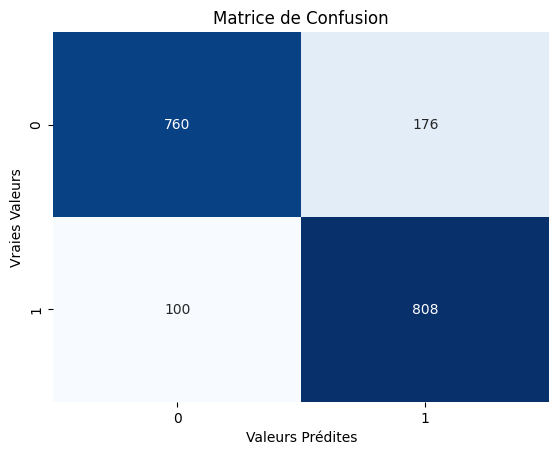

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Ajout de labels et de titres
plt.title('Matrice de Confusion')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Vraies Valeurs')

# Affichage de la matrice de confusion
plt.show()


In [ ]:
print(classification_report(y_test, y_predicted))
print(accuracy_score(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       936
           1       0.82      0.89      0.85       908

    accuracy                           0.85      1844
   macro avg       0.85      0.85      0.85      1844
weighted avg       0.85      0.85      0.85      1844

0.8503253796095445
